### Preporcessing Data (Normalization)

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#read in dataset
insurance = pd.read_csv("..\..\datasets\insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # avalues will be between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker', 'region'])
    )

# Create X,y
X = insurance.drop('charges' , axis =1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# fit the column tranformer to our training data
ct.fit(X_train)

# transform training and test data with our normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [11]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [12]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [14]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Build a NN-model with the normalized data

**Model 1**

9/9 [==============================] - 0s 667us/step - loss: 3438.7844 - mae: 3438.7844


Text(0.5, 0, 'epochs')

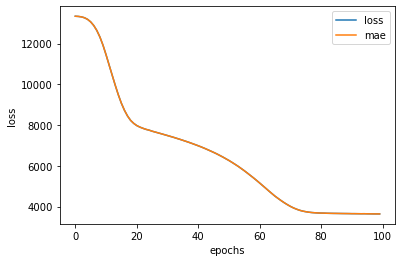

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name = 'input_layer'))

model.add(tf.keras.layers.Dense(10))

model.add(tf.keras.layers.Dense(1, name = 'output_layer'))
          
    
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics = ['mae'])

history = model.fit(X_train_normal, y_train, epochs =100, verbose =0)

model.evaluate(X_test_normal, y_test)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Model_2 was trained on unnormalized data while all other parameters stood the same  (M2 loss: 4924.3477 - mae: 4924.3477 vs  loss: 3438.7844 - mae: 3438.7844 with norm. data)

In [25]:
y_train.max(), y_train.mean(), y_train.min()

(62592.87309, 13346.089736364489, 1121.8739)

Model 2

9/9 [==============================] - 0s 556us/step - loss: 3159.3645 - mae: 3159.3645


Text(0.5, 0, 'epochs')

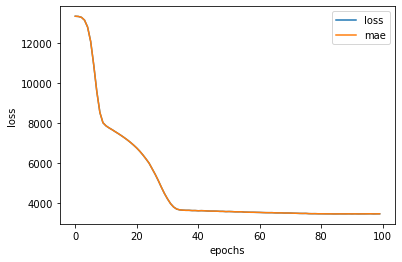

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name = 'input_layer'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(10))

model.add(tf.keras.layers.Dense(1, name = 'output_layer'))
          
    
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics = ['mae'])

history = model.fit(X_train_normal, y_train, epochs =100, verbose =0)

model.evaluate(X_test_normal, y_test)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Model 3

9/9 [==============================] - 0s 556us/step - loss: 3160.0708 - mae: 3160.0708


Text(0.5, 0, 'epochs')

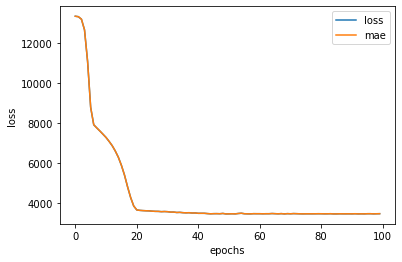

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name = 'input_layer'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(10))

model.add(tf.keras.layers.Dense(1, name = 'output_layer'))
          
    
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics = ['mae'])

history = model.fit(X_train_normal, y_train, epochs =100, verbose =0)

model.evaluate(X_test_normal, y_test)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')